# Hawaii Vacation
 
You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, presented is the climate analysis on the area. 

#1. Precipitation Analysis
#2. Station analysis
#3. Climate app
#4. Temperature analysis
#5. Daily Rainfall Average for target vacation days 


In [237]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [238]:
import numpy as np
import pandas as pd


In [239]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [240]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [241]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [242]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [243]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement


In [244]:
# Save references to each table
Station = Base.classes.station


In [245]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [246]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [247]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [248]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [249]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [250]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [251]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [252]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [253]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
            filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(results, columns=['measurement_id', 'measurement_station', 'measurement_date', 'measurement_prcp', 'measurement_tobs'])
df.set_index('measurement_date', inplace=True)
df.head()


,measurement_id,measurement_station,measurement_prcp,measurement_tobs
measurement_date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0
2016-08-28,2369,USC00519397,0.01,78.0


In [254]:
# Sort the dataframe by date

df = df.sort_index().dropna()
df = df.rename (columns = {
    "measurement_station" : "station",
    "measurement_prcp" : "precipitation",
    "measurement_tobs" : "tobs"
    })
df.head()


,measurement_id,station,precipitation,tobs
measurement_date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
2016-08-24,19203,USC00516128,1.45,74.0


In [255]:
len(df)


2015

In [256]:
precipitation_df = df[['precipitation']]
precipitation_df.head()


,precipitation
measurement_date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


Text(0, 0.5, 'Inches')

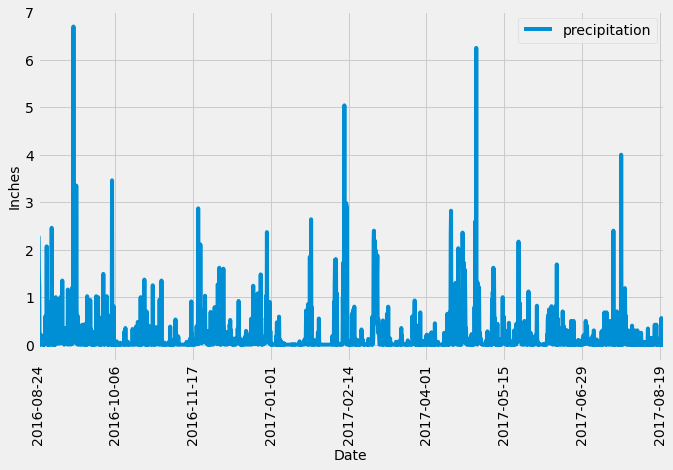

In [257]:
precipitation_df.plot(rot=90, figsize=(10,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Inches", fontsize=14)


In [258]:
# Summary statistics
precipitation_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [259]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Station.station).count()
station_num 


9

In [260]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [261]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
first_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
first_station


[(54.0, 85.0, 71.66378066378067)]

In [262]:
# Choose the station with the highest number of temperature observations.
active_station[0]


('USC00519281', 2772)

In [263]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
first_station_T = session.query(Measurement.tobs).\
        filter(Measurement.station=='USC00519281').\
        filter(Measurement.date > query_date).all()
#first_station_T


In [264]:
Station_T_df = pd.DataFrame(first_station_T)
Station_T_df.head()


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


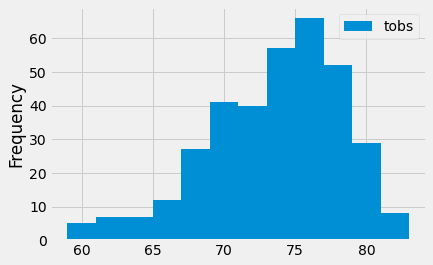

In [265]:
Station_T_df.plot.hist(bins=12)


In [266]:
results = session.query(Measurement.date, Measurement.prcp).all()
results[5][0]


'2010-01-07'

In [267]:
# Query min, max, avg temperatures for a time period starting from a date inputed by a user

dates = session.query(Measurement.date).all()
list_dates = list(np.ravel(dates))

input_d = input("input start_date: ")

for date in list_dates:
    if date == input_d:
        query_date = date
        print("found it!", query_date)

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.date >= query_date).all()
start_date_query = list(np.ravel(results))
start_date_query


input start_date: 2013-03-03
found it! 2013-03-03
found it! 2013-03-03
found it! 2013-03-03
found it! 2013-03-03
found it! 2013-03-03
found it! 2013-03-03


[53.0, 87.0, 73.72183130768528]

In [268]:
# Create dictionary to input date (keys) and precipiations (values) results
dtt = {}
for result in results:    
    dtt[result[0]] = result[1]
#dtt
    

## Bonus Challenge Assignment

In [269]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    dates = session.query(Measurement.date).all()
    
    start_query_date = ""
    end_query_date = ""
    
    list_dates = list(np.ravel(dates))
    
    for date in list_dates:
        if date == str(start_date):
            start_query_date = date
        if date == str(end_date):
            end_query_date = date
    
    if (start_query_date !="" and end_query_date !=""):
        return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_query_date).filter(Measurement.date <= end_query_date).all()
    else:
        return("Error: date range not found")

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [286]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-09-20', '2016-10-03'))


[(70.0, 77.97826086956522, 83.0)]


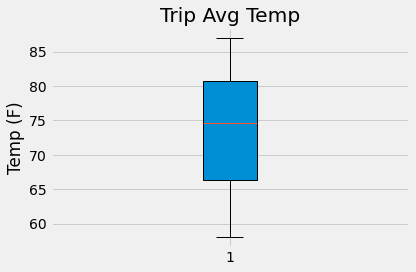

In [271]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

query_list = list(np.ravel(calc_temps('2016-08-23', '2017-08-23')))


fig, ax = plt.subplots()

x = range(len(query_list))
ax.boxplot(query_list, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp (F)')
fig.tight_layout()
plt.show()


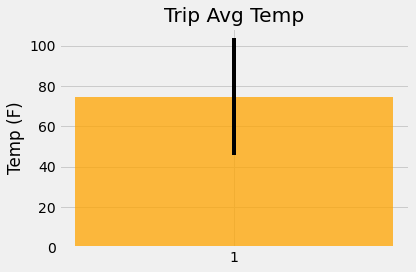

In [272]:
TAT = query_list[1]

error = query_list[2] - query_list[0]

fig, ax = plt.subplots()
ax.bar(1, TAT, yerr=error, align='center', alpha=0.75, color = "orange", ecolor='black')
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')
ax.set_xticks([1])

ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


In [273]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

start_query_date = '2016-08-23' 
end_query_date = '2017-08-23'
rainfall_station = session.query(Measurement.station, Measurement.prcp).\
            group_by(Measurement.station).\
            filter(Measurement.date >= start_query_date).\
            filter(Measurement.date <= end_query_date).all()
rainfall_station                                

[('USC00513117', 0.15),
 ('USC00514830', 0.05),
 ('USC00516128', 0.7),
 ('USC00517948', None),
 ('USC00519281', 1.79),
 ('USC00519397', 0.0),
 ('USC00519523', 0.02)]

In [274]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_station_df = pd.DataFrame(rainfall_station, columns=['station', 'prcp']).dropna()

rainfall_station_df = rainfall_station_df.sort_values(['prcp'], ascending=False)
rainfall_station_df

,station,prcp
4,USC00519281,1.79
2,USC00516128,0.70
0,USC00513117,0.15
1,USC00514830,0.05
6,USC00519523,0.02
5,USC00519397,0.00


In [278]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_info = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
station_info_df = pd.DataFrame(station_info, columns=['station', 'name', 'latitude', 'longitude', 'elevation'])
station_info_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [279]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_rainfall_df = pd.merge(rainfall_station_df, station_info_df, on=['station'])
station_rainfall_df.set_index('station', inplace=True)
station_rainfall_df

,prcp,name,latitude,longitude,elevation
station,,,,,
USC00519281,1.79,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00516128,0.70,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
USC00513117,0.15,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00514830,0.05,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00519523,0.02,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00519397,0.00,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


In [280]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [281]:
#Use the daily_normals function to calculate the normals for each date string and append the results to a list:

# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Create a list of dates for your trip in the format %m-%d

start_date = '2020-09-20'
end_date = '2020-10-03'

range_date = pd.date_range(start=start_date, end=end_date, freq='D')
range_date_list = range_date.strftime("%m-%d").to_list()

normals = []

# Loop through the list of %m-%d strings and calculate the normals for each date

for query_date in range_date_list:
    normals.append(daily_normals(query_date))

normals

[[(69.0, 76.14583333333333, 83.0)],
 [(67.0, 76.44897959183673, 84.0)],
 [(69.0, 76.37254901960785, 84.0)],
 [(67.0, 75.82692307692308, 83.0)],
 [(69.0, 77.02, 85.0)],
 [(69.0, 76.14893617021276, 83.0)],
 [(66.0, 75.64, 85.0)],
 [(68.0, 75.64, 83.0)],
 [(67.0, 76.13461538461539, 84.0)],
 [(68.0, 75.97872340425532, 83.0)],
 [(67.0, 75.3061224489796, 83.0)],
 [(69.0, 75.22916666666667, 80.0)],
 [(70.0, 76.26, 83.0)],
 [(66.0, 76.73076923076923, 84.0)]]

In [282]:
# Load the previous query results into a Pandas DataFrame to export T-stats

Tstats_df = pd.DataFrame(normals, columns=['Tstats'])
Tstats_df

,Tstats
0,"(69.0, 76.14583333333333, 83.0)"
1,"(67.0, 76.44897959183673, 84.0)"
2,"(69.0, 76.37254901960785, 84.0)"
3,"(67.0, 75.82692307692308, 83.0)"
4,"(69.0, 77.02, 85.0)"
5,"(69.0, 76.14893617021276, 83.0)"
6,"(66.0, 75.64, 85.0)"
7,"(68.0, 75.64, 83.0)"
8,"(67.0, 76.13461538461539, 84.0)"
9,"(68.0, 75.97872340425532, 83.0)"


In [283]:
#Export Temperature stats into separate columns

Tmin=[]
Tavg=[]
Tmax=[]
for index in range(len(vac_df)):
    Tmin.append(Tstats_df['Tstats'][index][0])
    Tavg.append(Tstats_df['Tstats'][index][1])
    Tmax.append(Tstats_df['Tstats'][index][2])


In [284]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

vac_df = pd.DataFrame({'date' : range_date_list,
                        'Tmin' : Tmin,
                        'Tavg' : Tavg,
                        'Tmax' : Tmax}, 
                        columns=['date','Tmin', 'Tavg', 'Tmax'])
vac_df.set_index('date', inplace=True)
vac_df

,Tmin,Tavg,Tmax
date,,,
09-20,69.0,76.145833,83.0
09-21,67.0,76.448980,84.0
09-22,69.0,76.372549,84.0
09-23,67.0,75.826923,83.0
09-24,69.0,77.020000,85.0
09-25,69.0,76.148936,83.0
09-26,66.0,75.640000,85.0
09-27,68.0,75.640000,83.0
09-28,67.0,76.134615,84.0


Text(0, 0.5, 'Temp (F)')

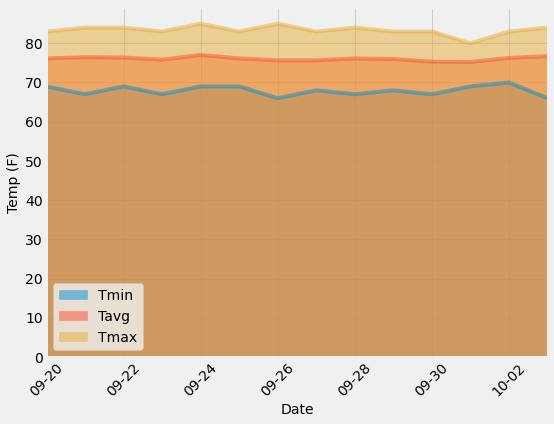

In [285]:
# Plot the daily normals as an area plot with `stacked=False`

vac_df.plot.area(stacked=False, rot=45,figsize=(8,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temp (F)", fontsize=14)